In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import itertools # Importando itertools para generar combinaciones de columnas
# Importando la función seasonal_decompose para la descomposición de series temporales
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.patches as mpatches
from sklearn import preprocessing 



import pandas as pd

# Cargar las tablas
fe_cp = pd.read_csv('/kaggle/input/business-payment/extract - fees - data analyst - .csv')
cr_cp = pd.read_csv('/kaggle/input/business-payment/extract - cash request - data analyst.csv')

# Unir las tablas usando la relación entre cash_request_id en fees y id en cash request
merged_data = pd.merge(cr_cp, fe_cp, left_on='id', right_on='cash_request_id', how='inner', suffixes=('_cr', '_fe'))

# Asegurar que las columnas de fechas sean datetime sin zona horaria
merged_data['created_at_cr'] = pd.to_datetime(merged_data['created_at_cr'], errors='coerce').dt.tz_localize(None)
merged_data['cash_request_received_date'] = pd.to_datetime(merged_data['cash_request_received_date'], errors='coerce').dt.tz_localize(None)

# Calcular métricas mensuales
monthly_data = merged_data.groupby(merged_data['created_at_cr'].dt.to_period('M')).agg(
    total_fees=('total_amount', lambda x: x[merged_data.loc[x.index, 'status_fe'] == 'accepted'].sum()),
    total_adelantos=('amount', lambda x: x[merged_data.loc[x.index, 'cash_request_received_date'].notna()].sum()),
    total_fees_regular=('total_amount', lambda x: x[(merged_data.loc[x.index, 'transfer_type'] == 'regular') & (merged_data.loc[x.index, 'status_fe'] == 'accepted')].sum()),
    total_adelantos_regular=('amount', lambda x: x[(merged_data.loc[x.index, 'transfer_type'] == 'regular') & (merged_data.loc[x.index, 'cash_request_received_date'].notna())].sum()),
    total_adelantos_instant=('amount', lambda x: x[(merged_data.loc[x.index, 'transfer_type'] == 'instant') & (merged_data.loc[x.index, 'cash_request_received_date'].notna())].sum()),
    total_fees_instant=('total_amount', lambda x: x[(merged_data.loc[x.index, 'transfer_type'] == 'instant') & (merged_data.loc[x.index, 'status_fe'] == 'accepted')].sum())
).reset_index()

# Calcular ratios
monthly_data['fees_ratio'] = monthly_data['total_fees'] / monthly_data['total_adelantos'] * 100
monthly_data['fees_ratio_regular'] = monthly_data['total_fees_regular'] / monthly_data['total_adelantos_regular'] * 100
monthly_data['fees_ratio_instant'] = monthly_data['total_fees_instant'] / monthly_data['total_adelantos_instant'] * 100

# Mostrar la evolución mensual
print(monthly_data)

merged_data.head(10)

/kaggle/input/business-payment/extract - fees - data analyst - .csv
/kaggle/input/business-payment/extract - cash request - data analyst.csv
  created_at_cr  total_fees  total_adelantos  total_fees_regular  \
0       2020-04         0.0            100.0                 0.0   
1       2020-05       520.0          24510.0               520.0   
2       2020-06      4685.0         162593.0              4685.0   
3       2020-07      5165.0         186750.0              4135.0   
4       2020-08     11700.0         304313.0               855.0   
5       2020-09     16785.0         370186.0               310.0   
6       2020-10     34840.0         566735.0               225.0   
7       2020-11       515.0           6775.0                 0.0   

   total_adelantos_regular  total_adelantos_instant  total_fees_instant  \
0                    100.0                      0.0                 0.0   
1                  24510.0                      0.0                 0.0   
2                 162

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,id_cr,amount,status_cr,created_at_cr,updated_at_cr,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,...,status_fe,category,total_amount,reason,created_at_fe,updated_at_fe,paid_at,from_date,to_date,charge_moment
0,23534,25.0,money_back,2020-10-23 15:20:26.163927,2020-12-18 13:08:29.099365+00,21465.0,NaN,NaN,2020-11-10 23:51:00+00,NaT,...,accepted,NaN,5.0,Instant Payment Cash Request 23534,2020-10-23 15:21:35.895711+00,2020-10-23 15:21:35.89574+00,2020-11-06 07:16:22.014422+00,NaN,NaN,after
1,2203,100.0,money_back,2020-05-27 02:26:27.615190,2020-06-09 11:25:51.72636+00,2109.0,2020-05-27 10:02:13.094467+00,NaN,2020-07-15 02:26:27+00,2020-05-29,...,accepted,NaN,5.0,Postpone Cash Request 2203,2020-06-09 11:25:52.449808+00,2020-10-13 14:25:00.867548+00,NaN,2020-06-15 02:26:27+00,2020-07-15 02:26:27+00,before
2,6098,100.0,active,2020-07-01 09:30:03.145410,2020-08-11 22:27:58.240406+00,23328.0,2020-07-01 16:44:53.070844+00,NaN,2020-08-03 22:00:00+00,2020-07-03,...,cancelled,NaN,5.0,Postpone Cash Request 6098,2020-08-13 10:58:39.63422+00,2020-10-13 14:25:16.660127+00,NaN,2020-08-03 22:00:00+00,2020-09-03 10:58:32.274+00,after
3,6098,100.0,active,2020-07-01 09:30:03.145410,2020-08-11 22:27:58.240406+00,23328.0,2020-07-01 16:44:53.070844+00,NaN,2020-08-03 22:00:00+00,2020-07-03,...,cancelled,NaN,5.0,Postpone Cash Request 6098,2020-08-13 10:58:52.603153+00,2020-10-13 14:25:16.661371+00,NaN,2020-08-03 22:00:00+00,2020-09-03 10:58:32.274+00,after
4,6098,100.0,active,2020-07-01 09:30:03.145410,2020-08-11 22:27:58.240406+00,23328.0,2020-07-01 16:44:53.070844+00,NaN,2020-08-03 22:00:00+00,2020-07-03,...,cancelled,NaN,5.0,Postpone Cash Request 6098,2020-08-13 11:00:39.879521+00,2020-10-13 14:25:16.662449+00,NaN,2020-08-03 22:00:00+00,2020-09-01 11:00:34.027+00,after
5,6098,100.0,active,2020-07-01 09:30:03.145410,2020-08-11 22:27:58.240406+00,23328.0,2020-07-01 16:44:53.070844+00,NaN,2020-08-03 22:00:00+00,2020-07-03,...,cancelled,NaN,5.0,Postpone Cash Request 6098,2020-08-19 16:30:48.607923+00,2020-10-13 14:25:16.91377+00,NaN,2020-08-03 22:00:00+00,2020-09-03 16:30:45.837+00,after
6,6098,100.0,active,2020-07-01 09:30:03.145410,2020-08-11 22:27:58.240406+00,23328.0,2020-07-01 16:44:53.070844+00,NaN,2020-08-03 22:00:00+00,2020-07-03,...,cancelled,month_delay_on_payment,5.0,month delay on payment - 9/2020,2020-09-10 22:32:51.726321+00,2020-12-15 17:07:43.211171+00,NaN,NaN,NaN,after
7,6098,100.0,active,2020-07-01 09:30:03.145410,2020-08-11 22:27:58.240406+00,23328.0,2020-07-01 16:44:53.070844+00,NaN,2020-08-03 22:00:00+00,2020-07-03,...,rejected,rejected_direct_debit,5.0,rejected direct debit,2020-08-11 22:27:55.370079+00,2020-10-13 14:25:05.431752+00,NaN,NaN,NaN,after
8,6098,100.0,active,2020-07-01 09:30:03.145410,2020-08-11 22:27:58.240406+00,23328.0,2020-07-01 16:44:53.070844+00,NaN,2020-08-03 22:00:00+00,2020-07-03,...,rejected,month_delay_on_payment,5.0,month delay on payment - 9/2020,2020-10-10 23:26:31.48232+00,2020-10-13 14:25:03.371439+00,NaN,NaN,NaN,after
9,3611,100.0,direct_debit_rejected,2020-06-17 11:03:32.617120,2020-07-21 22:09:32.695508+00,15415.0,2020-06-17 14:52:56.14175+00,NaN,2020-07-17 11:03:52.469+00,2020-06-18,...,rejected,rejected_direct_debit,5.0,rejected direct debit,2020-07-21 22:09:32.585036+00,2020-10-13 14:25:00.836605+00,NaN,NaN,NaN,after


El fees ratio (ratio de fees) es una métrica que indica la proporción de ingresos por fees (tarifas cobradas) en relación con el monto total de adelantos de efectivo otorgados.

**¿Qué mide?**
* Qué porcentaje de los adelantos de efectivo proviene de las tarifas cobradas a los clientes.
* Si el fees ratio es alto, significa que el banco está obteniendo una parte significativa de sus ingresos de las tarifas.
* Si es bajo, podría indicar que:
1. Se están cobrando menos fees en relación al dinero adelantado.
1. O que la mayoría de los adelantos no generan fees (por descuentos, promociones, etc.).

**¿Por qué es importante?**
* Evaluar la rentabilidad de los adelantos de efectivo.
* Analizar si la estrategia de cobro de fees está siendo efectiva.
* Comparar diferentes tipos de transferencias (por ejemplo, instant vs regular) para ver cuál genera más ingresos.
* Identificar posibles ajustes en las políticas de fees si el ratio es muy bajo o inestable.

**¿Qué te puede decir el fees ratio en tu dataset?**
* Si hay meses con fees ratio alto, es probable que ese mes se hayan cobrado más tarifas o se hayan gestionado más adelantos con fees.
* Un fees ratio bajo podría indicar:
1. Promociones o descuentos en fees.
1. Más adelantos gratuitos o fallos en el cobro de fees.
* Tendencia a lo largo del tiempo: Puedes ver si el fees ratio está aumentando, disminuyendo o se mantiene estable, lo cual te ayuda a tomar decisiones sobre las políticas de cobro.

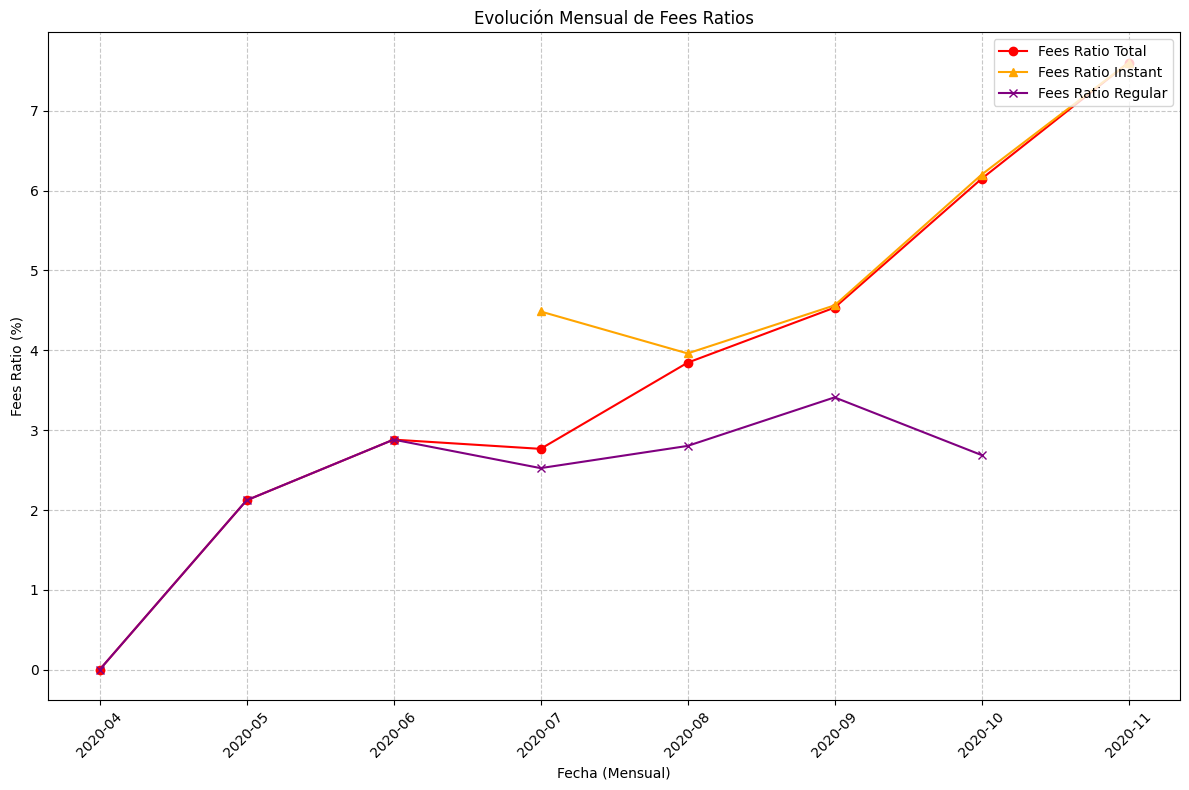

In [19]:
import matplotlib.pyplot as plt

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar los tres ratios en el eje principal
ax.plot(
    monthly_data['created_at_cr'].astype(str), 
    monthly_data['fees_ratio'], 
    marker='o', 
    label='Fees Ratio Total', 
    color='red'
)
ax.plot(
    monthly_data['created_at_cr'].astype(str), 
    monthly_data['fees_ratio_instant'], 
    marker='^', 
    label='Fees Ratio Instant', 
    color='orange'
)
ax.plot(
    monthly_data['created_at_cr'].astype(str), 
    monthly_data['fees_ratio_regular'], 
    marker='x', 
    label='Fees Ratio Regular', 
    color='purple'
)

# Configurar etiquetas y título
ax.set_xlabel('Fecha (Mensual)')
ax.set_ylabel('Fees Ratio (%)')
ax.set_title('Evolución Mensual de Fees Ratios')
ax.legend(loc='upper right')  # Mostrar la leyenda
ax.grid(True, linestyle='--', alpha=0.7)

# Rotar las etiquetas del eje x para mejor visualización
plt.xticks(rotation=45)

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

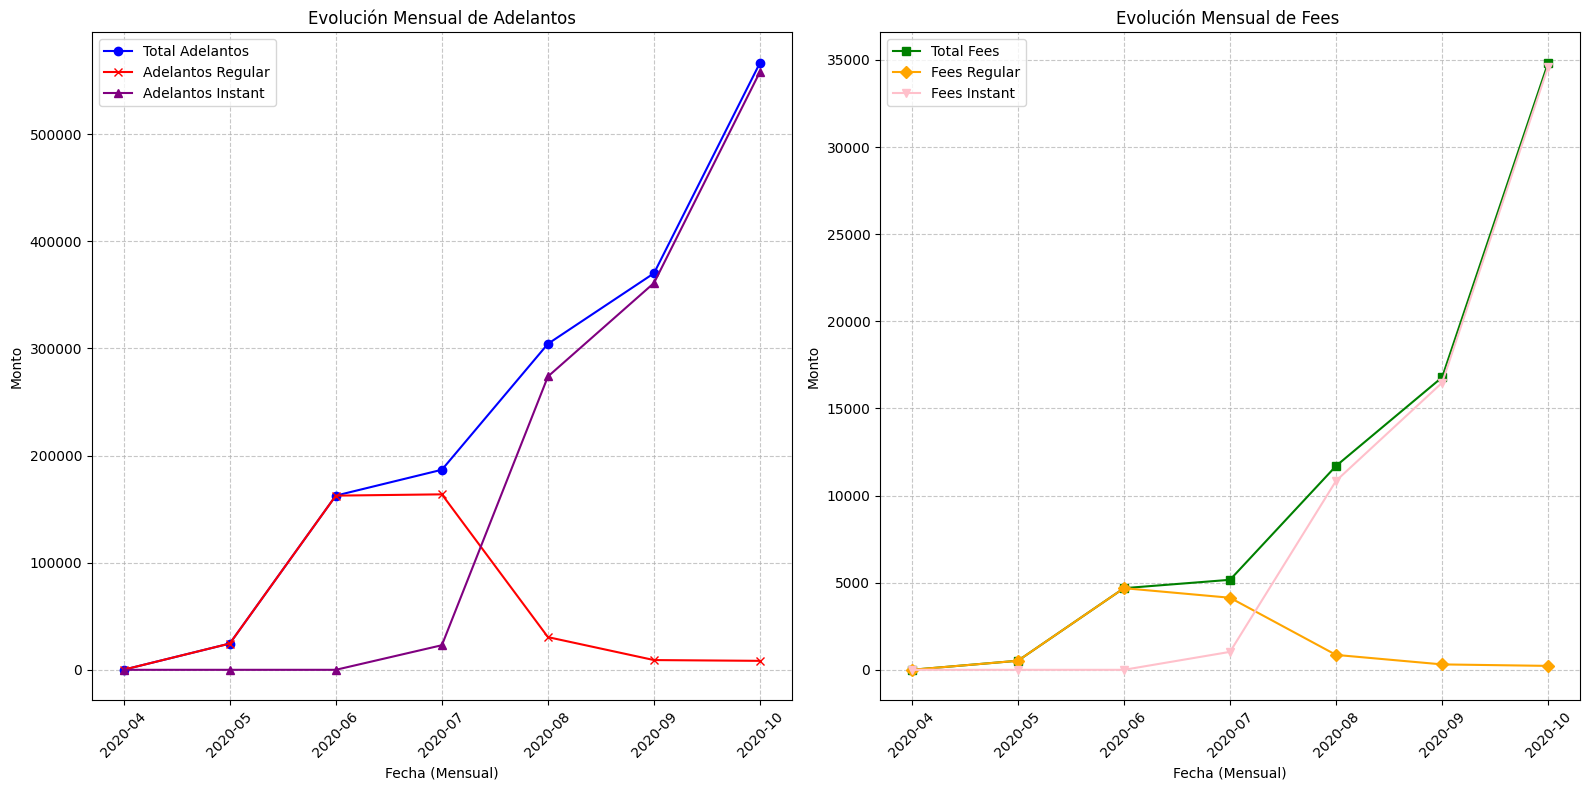

In [20]:
import matplotlib.pyplot as plt

# Filtrar los datos para excluir noviembre
filtered_data = monthly_data[~((monthly_data['created_at_cr'].dt.year == 2020) & (monthly_data['created_at_cr'].dt.month == 11))]

# Crear la figura y los ejes para dos gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Graficar adelantos
ax1.plot(
    filtered_data['created_at_cr'].astype(str),
    filtered_data['total_adelantos'],
    marker='o',
    label='Total Adelantos',
    color='blue'
)
ax1.plot(
    filtered_data['created_at_cr'].astype(str),
    filtered_data['total_adelantos_regular'],
    marker='x',
    label='Adelantos Regular',
    color='red'
)
ax1.plot(
    filtered_data['created_at_cr'].astype(str),
    filtered_data['total_adelantos_instant'],
    marker='^',
    label='Adelantos Instant',
    color='purple'
)
ax1.set_xlabel('Fecha (Mensual)')
ax1.set_ylabel('Monto')
ax1.set_title('Evolución Mensual de Adelantos')
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.tick_params(axis='x', rotation=45)

# Graficar fees
ax2.plot(
    filtered_data['created_at_cr'].astype(str),
    filtered_data['total_fees'],
    marker='s',
    label='Total Fees',
    color='green'
)
ax2.plot(
    filtered_data['created_at_cr'].astype(str),
    filtered_data['total_fees_regular'],
    marker='D',
    label='Fees Regular',
    color='orange'
)
ax2.plot(
    filtered_data['created_at_cr'].astype(str),
    filtered_data['total_fees_instant'],
    marker='v',
    label='Fees Instant',
    color='pink'
)
ax2.set_xlabel('Fecha (Mensual)')
ax2.set_ylabel('Monto')
ax2.set_title('Evolución Mensual de Fees ')
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


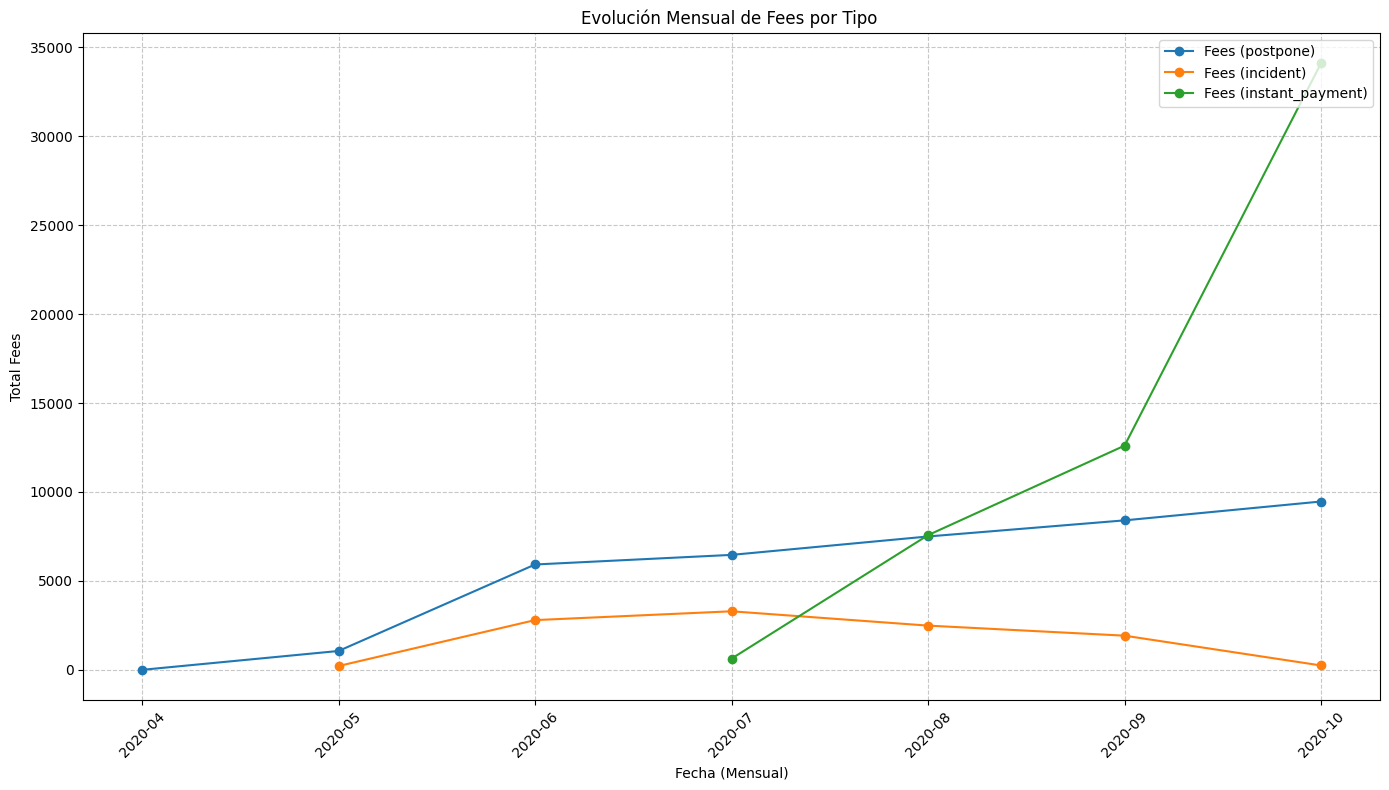

In [21]:
import matplotlib.pyplot as plt

# Excluir datos de noviembre de 2020
filtered_data = merged_data[~((merged_data['created_at_cr'].dt.year == 2020) & (merged_data['created_at_cr'].dt.month == 11))]

# Filtrar los datos por tipos específicos correctos
filtered_data = filtered_data[filtered_data['type'].isin(['incident', 'postpone', 'instant_payment'])]

# Ordenar por fecha en orden ascendente
filtered_data = filtered_data.sort_values(by='created_at_cr', ascending=True)

# Agrupar por mes y tipo, calculando el total de fees
fees_by_type = filtered_data.groupby([filtered_data['created_at_cr'].dt.to_period('M'), 'type'])['total_amount'].sum().reset_index()

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(14, 8))

# Obtener los tipos únicos y asignar colores
types = fees_by_type['type'].unique()
colors = plt.cm.tab10(range(len(types)))

# Graficar los fees por cada tipo
for t, color in zip(types, colors):
    type_data = fees_by_type[fees_by_type['type'] == t]
    ax.plot(
        type_data['created_at_cr'].astype(str),
        type_data['total_amount'],
        marker='o',
        label=f'Fees ({t})',
        color=color
    )

ax.set_xlabel('Fecha (Mensual)')
ax.set_ylabel('Total Fees')
ax.set_title('Evolución Mensual de Fees por Tipo ')
ax.legend(loc='upper right')
ax.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


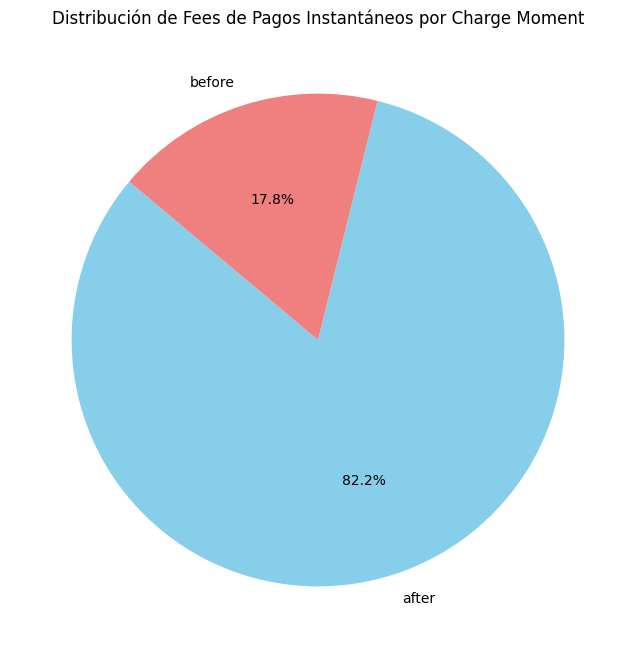

In [22]:
import matplotlib.pyplot as plt

# Filtrar pagos instantáneos
instant_fees = merged_data[merged_data['transfer_type'] == 'instant']

# Agrupar por 'charge_moment' y calcular la suma total de fees
fees_by_charge_moment = (
    instant_fees.groupby('charge_moment')['total_amount']
    .sum()
    .reset_index()
)

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(
    fees_by_charge_moment['total_amount'],  # Datos de los fees
    labels=fees_by_charge_moment['charge_moment'],  # Etiquetas de los momentos de carga
    autopct='%1.1f%%',  # Mostrar el porcentaje en el gráfico
    startangle=140,  # Ángulo de inicio del gráfico de pastel
    colors=['skyblue', 'lightcoral']  # Colores para las porciones del pastel
)

# Configurar el título del gráfico
plt.title('Distribución de Fees de Pagos Instantáneos por Charge Moment')

# Mostrar el gráfico
plt.show()

El gráfico de pastel representa la distribución de fees generados en pagos instantáneos según el charge_moment, que es el momento en el que se cobra la tarifa.

Cada porción del gráfico muestra qué porcentaje del total de fees proviene de cada charge_moment.

**¿Qué conclusiones sacamos?**
1. Identificar el momento en el que más fees se generan:

1. Si una porción es mucho más grande que las otras, significa que la mayoría de los fees de pagos instantáneos se cobran en ese momento.
Esto puede ayudar a entender cuándo los clientes están dispuestos a pagar más fees.
Evaluar la estrategia de cobro:

1. Si un charge_moment genera muy pocos fees, podrías preguntarte si tiene sentido mantener esa estructura de cobro o si deberías incentivar otros momentos con mayores ingresos.


* Detectar patrones de comportamiento:

1. Si los fees se concentran en un solo charge_moment, puede indicar que los clientes prefieren pagar en ese momento, lo que podría estar influenciado por factores como:
    * Comodidad del usuario.
    * Promociones o descuentos en ciertas horas.
    * Mayor uso de pagos instantáneos en un horario específico.
1. Comparar con otros tipos de transferencias:

* Si en las transferencias regulares la distribución es diferente, podrías analizar por qué los clientes prefieren un momento de cobro específico en pagos instantáneos.

**Ejemplo de interpretación:**
* Si el 80% de los fees provienen de un solo charge_moment, entonces es un momento clave en la estrategia de cobro.
* Si los fees están bien distribuidos, significa que los clientes no tienen una preferencia clara, lo que puede ser positivo para la estabilidad de ingresos.

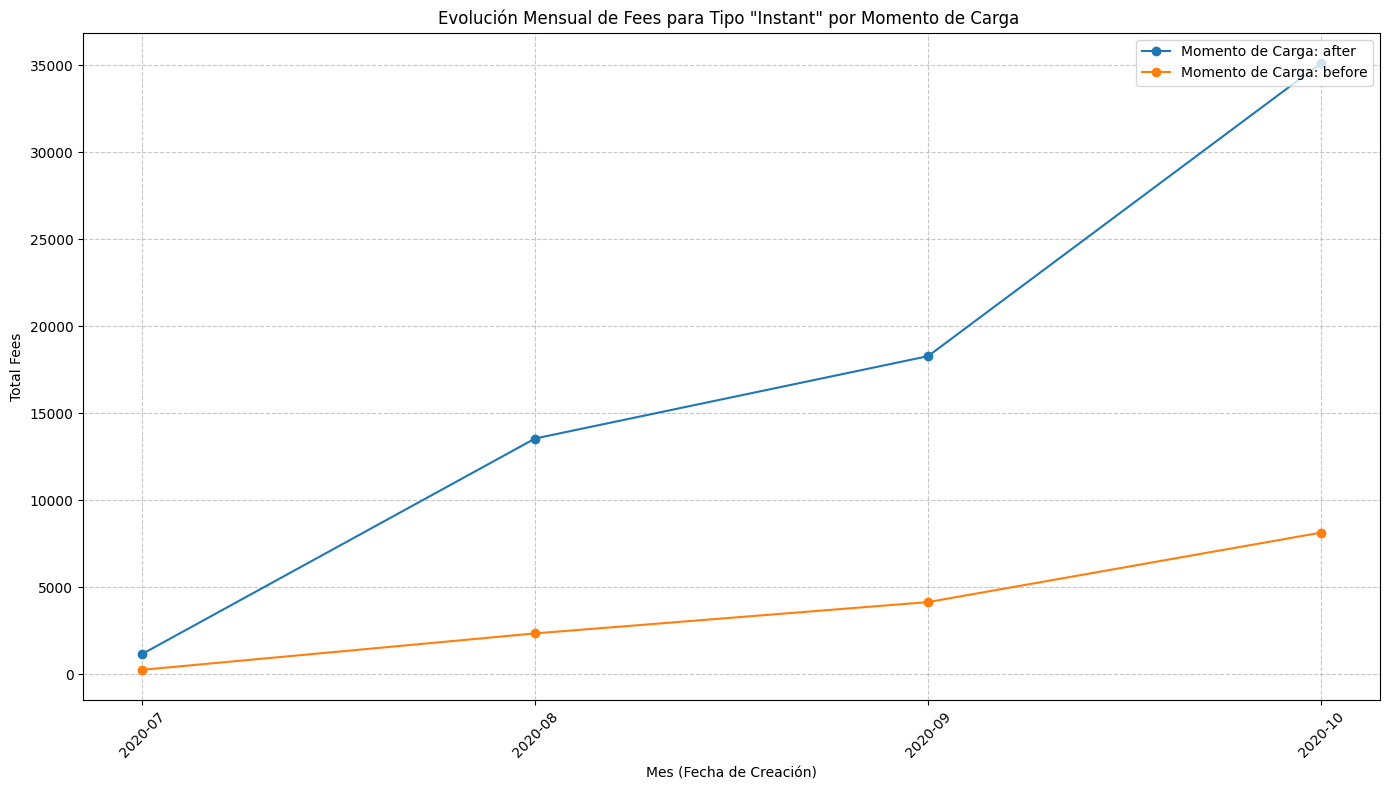

In [23]:
import matplotlib.pyplot as plt

# Verificar si la columna 'charge_moment' existe
if 'charge_moment' in merged_data.columns:
    # Filtrar datos por el tipo 'instant'
    instant_data = merged_data[(merged_data['transfer_type'] == 'instant') & 
                               ~((merged_data['created_at_cr'].dt.year == 2020) & (merged_data['created_at_cr'].dt.month == 11))]

    # Agrupar por 'created_at_cr' (mensual) y 'charge_moment', calculando el total de fees
    fees_by_charge_moment = instant_data.groupby([instant_data['created_at_cr'].dt.to_period('M'), 'charge_moment'])['total_amount'].sum().reset_index()

    # Crear la figura y los ejes
    fig, ax = plt.subplots(figsize=(14, 8))

    # Obtener los valores únicos de 'charge_moment' y asignar colores
    charge_moments = fees_by_charge_moment['charge_moment'].unique()
    colors = plt.cm.tab10(range(len(charge_moments)))

    # Graficar los fees por cada momento de cargo
    for cm, color in zip(charge_moments, colors):
        charge_moment_data = fees_by_charge_moment[fees_by_charge_moment['charge_moment'] == cm]
        ax.plot(
            charge_moment_data['created_at_cr'].astype(str),
            charge_moment_data['total_amount'],
            marker='o',
            label=f'Momento de Carga: {cm}',
            color=color
        )

    # Configurar etiquetas y título del gráfico
    ax.set_xlabel('Mes (Fecha de Creación)')
    ax.set_ylabel('Total Fees')
    ax.set_title('Evolución Mensual de Fees para Tipo "Instant" por Momento de Carga ')

    # Mostrar la leyenda en la esquina superior derecha
    ax.legend(loc='upper right')

    # Mostrar una cuadrícula para facilitar la lectura
    ax.grid(True, linestyle='--', alpha=0.7)

    # Rotar las etiquetas del eje x para una mejor visualización
    plt.xticks(rotation=45)

    # Ajustar el diseño y mostrar el gráfico
    plt.tight_layout()
    plt.show()
else:
    print("La columna 'charge_moment' no existe en merged_data.")


Este gráfico muestra cómo evolucionan los fees cobrados en pagos instantáneos (instant) según el charge_moment a lo largo del tiempo.

Cada línea representa un charge_moment diferente (momentos específicos en los que se cobran los fees), permitiendo analizar cuándo se generan más fees en este tipo de transferencias.

**¿Qué información se puede obtener?**
1. Identificar los momentos de cobro más rentables:

    * Si una línea es significativamente más alta que las demás, significa que la mayoría de los fees provienen de ese charge_moment.
    * Esto puede indicar una preferencia del sistema o de los clientes por realizar pagos instantáneos en ciertos momentos.
  
1. Comparar la estabilidad de los fees:

    * Si las líneas muestran tendencias constantes, significa que los fees se distribuyen de manera estable en diferentes charge_moment.
    * Si hay altibajos, puede reflejar cambios en la política de cobro o variaciones estacionales en el uso de pagos instantáneos.

1. Detectar cambios en el comportamiento del usuario:

    * Si un charge_moment tenía altos ingresos pero empieza a bajar, puede ser una señal de que los clientes han cambiado su hábito de pago o que se ha modificado la política de fees.
    * Si aparece una nueva tendencia en ciertos meses, podría deberse a ofertas, descuentos o cambios en el servicio.

1. Analizar tendencias en el tiempo:

    * Puedes ver si hay un aumento general en los fees de pagos instantáneos o si estos se han mantenido estables.
    * Si el gráfico muestra picos en ciertos meses, es posible que haya habido eventos especiales o promociones que impulsaron el uso de pagos instantáneos.

**Ejemplo de interpretación:**
Si un charge_moment representa el 70% de los fees en pagos instantáneos, significa que ese momento es clave para el negocio y podrías ajustar estrategias para maximizar ingresos.
Si los fees disminuyen en todos los charge_moment, podría indicar que los clientes están usando menos pagos instantáneos o que han cambiado a otros métodos de pago.

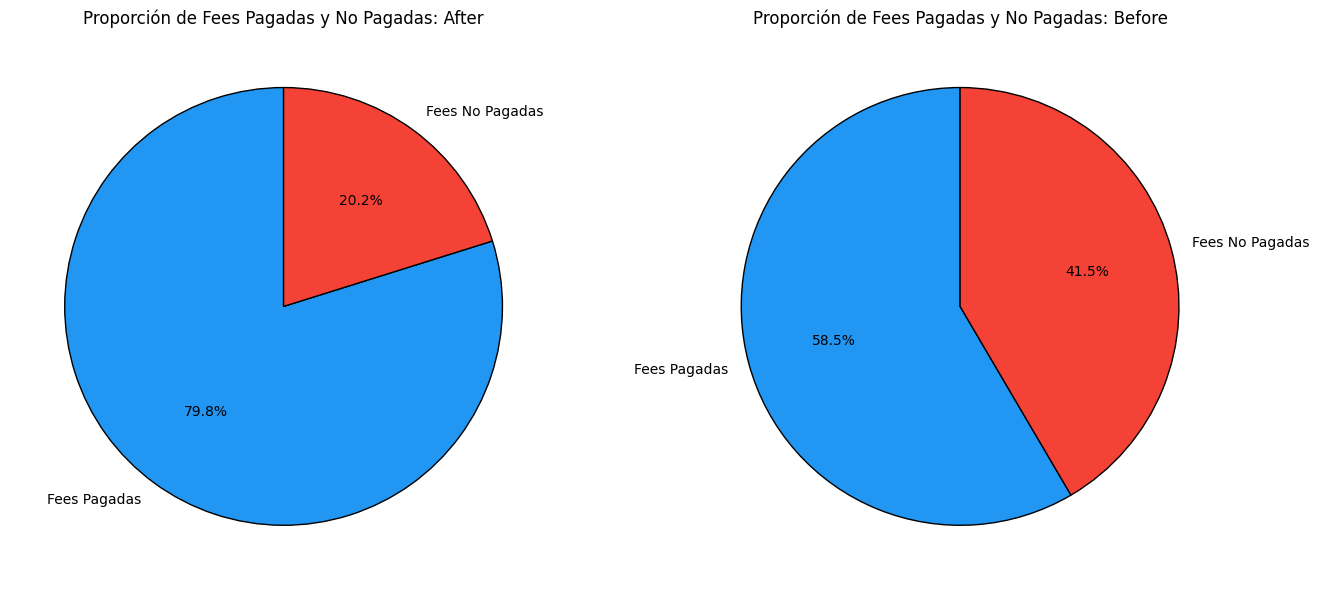

In [24]:
import matplotlib.pyplot as plt

if 'charge_moment' in merged_data.columns:
    instant_fees = merged_data[merged_data['transfer_type'] == 'instant']
    fees_summary = instant_fees.groupby('charge_moment').agg(
        paid_fees=('status_fe', lambda x: (x == 'accepted').sum()),
        non_paid_fees=('status_fe', lambda x: (x != 'accepted').sum()),
    ).reset_index()

    fig, axes = plt.subplots(1, len(fees_summary['charge_moment'].unique()), figsize=(14, 6))
    if len(fees_summary['charge_moment'].unique()) == 1:
        axes = [axes]

    for idx, moment in enumerate(fees_summary['charge_moment'].unique()):
        data = fees_summary[fees_summary['charge_moment'] == moment]
        labels = ['Fees Pagadas', 'Fees No Pagadas']
        sizes = [data['paid_fees'].values[0], data['non_paid_fees'].values[0]]
        colors = ['#2196f3', '#f44336']  # Azul y rojo

        axes[idx].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
        axes[idx].set_title(f'Proporción de Fees Pagadas y No Pagadas: {moment.capitalize()}')

    plt.tight_layout()
    plt.show()
else:
    print("La columna 'charge_moment' no existe en merged_data.")


Los gráficos de pastel muestran la proporción de fees pagadas (accepted) y no pagadas en pagos instantáneos, desglosadas por charge_moment. Esto permite analizar cómo y cuándo los clientes pagan sus fees.

**Conclusiones que sacamos:**

1. Comparar la efectividad de los momentos de cobro (charge_moment)

    * Si en un charge_moment la mayoría de los fees se pagan, significa que ese es un momento efectivo para cobrar.
    * Si en otro charge_moment hay muchas fees no pagadas, puede indicar que los clientes no suelen pagar en ese momento.

1. Identificar problemas en el cobro de fees

    * Si el porcentaje de fees no pagadas es alto en todos los charge_moment, puede haber un problema con la estrategia de cobro (quizás los clientes no pueden pagar en esos momentos o hay fallos en el sistema de cobro).
    * Si solo un charge_moment tiene muchas fees impagas, podría ser un horario o método de cobro poco conveniente para los clientes.

1. Analizar patrones de pago de los clientes

    * Si las fees pagadas son mayores en ciertos momentos, podrías priorizar esos horarios para futuras estrategias de cobro.
    * Si las fees impagas son muy altas en ciertos momentos, podrías evaluar alternativas (recordatorios, cambios en la estrategia de cobro, etc.).

1. Evaluar la rentabilidad de los pagos instantáneos

    * Si la mayoría de los fees se pagan, significa que los pagos instantáneos generan ingresos de manera estable.
    * Si hay muchas fees impagas, puede indicar que este método de pago no es tan rentable como parece y necesita ajustes.

**Ejemplo de interpretación:**
Si en charge_moment = before el 80% de los fees se pagan y en charge_moment = after solo el 40%, entonces los clientes pagan más antes del evento.
→ Podrías incentivar este momento con descuentos o ajustar estrategias de cobro.

Si en ambos charge_moment hay más del 50% de fees impagas, es una alerta para revisar por qué los clientes no están pagando.

<ipython-input-25-756d5c79bba4>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_filtered['cohort'] = merged_data_filtered['user_id'].apply(assign_cohort)


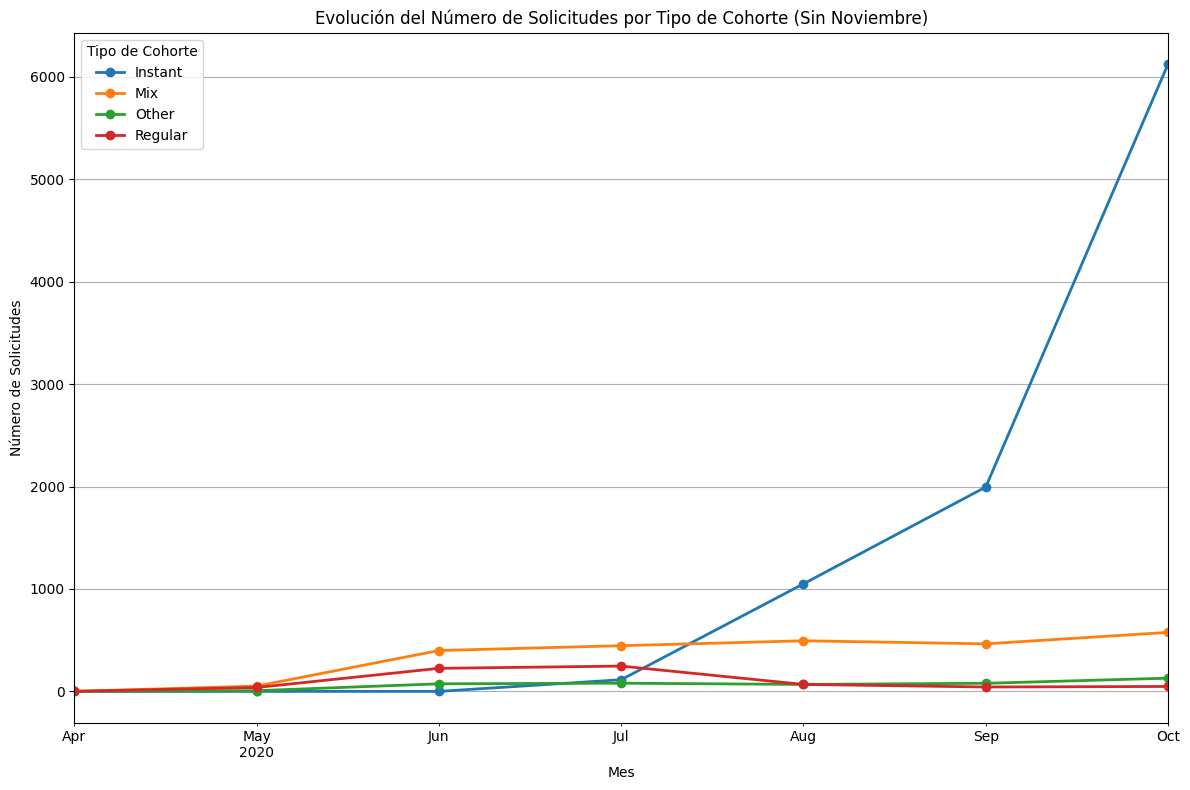

In [25]:
import matplotlib.pyplot as plt

# Excluir datos de noviembre de 2020
merged_data_filtered = merged_data[~((merged_data['created_at_cr'].dt.year == 2020) & (merged_data['created_at_cr'].dt.month == 11))]

# Filtrar merged_data para clientes con transfer_type 'regular' y 'instant'
regular_clients = merged_data_filtered[merged_data_filtered['transfer_type'] == 'regular']
instant_clients = merged_data_filtered[merged_data_filtered['transfer_type'] == 'instant']

# Identificar los usuarios únicos
regular_users = set(regular_clients['user_id'].unique())
instant_users = set(instant_clients['user_id'].unique())

# Clasificar usuarios
regular_only_users = regular_users - instant_users
instant_only_users = instant_users - regular_users
mix_users = regular_users & instant_users

def assign_cohort(user_id):
    if user_id in regular_only_users:
        return 'Regular'
    elif user_id in instant_only_users:
        return 'Instant'
    elif user_id in mix_users:
        return 'Mix'
    else:
        return 'Other'

merged_data_filtered['cohort'] = merged_data_filtered['user_id'].apply(assign_cohort)

# Calcular el número de solicitudes por cohorte y mes
monthly_requests_cohort = merged_data_filtered.groupby([merged_data_filtered['created_at_cr'].dt.to_period('M'), 'cohort'])['id_cr'].nunique().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
monthly_requests_cohort.plot(kind='line', marker='o', linestyle='-', linewidth=2, ax=plt.gca())
plt.title('Evolución del Número de Solicitudes por Tipo de Cohorte (Sin Noviembre)')
plt.ylabel('Número de Solicitudes')
plt.xlabel('Mes')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Cohorte', loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [26]:
# Crear columna 'Cohorte' que indica el mes de la primera solicitud de cada cliente
merged_data['Cohorte'] = merged_data.groupby('user_id')['created_at_cr'].transform('min').dt.to_period('M')
merged_data.head(10)



/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,id_cr,amount,status_cr,created_at_cr,updated_at_cr,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,...,category,total_amount,reason,created_at_fe,updated_at_fe,paid_at,from_date,to_date,charge_moment,Cohorte
0,23534,25.0,money_back,2020-10-23 15:20:26.163927,2020-12-18 13:08:29.099365+00,21465.0,NaN,NaN,2020-11-10 23:51:00+00,NaT,...,NaN,5.0,Instant Payment Cash Request 23534,2020-10-23 15:21:35.895711+00,2020-10-23 15:21:35.89574+00,2020-11-06 07:16:22.014422+00,NaN,NaN,after,2020-10
1,2203,100.0,money_back,2020-05-27 02:26:27.615190,2020-06-09 11:25:51.72636+00,2109.0,2020-05-27 10:02:13.094467+00,NaN,2020-07-15 02:26:27+00,2020-05-29,...,NaN,5.0,Postpone Cash Request 2203,2020-06-09 11:25:52.449808+00,2020-10-13 14:25:00.867548+00,NaN,2020-06-15 02:26:27+00,2020-07-15 02:26:27+00,before,2020-05
2,6098,100.0,active,2020-07-01 09:30:03.145410,2020-08-11 22:27:58.240406+00,23328.0,2020-07-01 16:44:53.070844+00,NaN,2020-08-03 22:00:00+00,2020-07-03,...,NaN,5.0,Postpone Cash Request 6098,2020-08-13 10:58:39.63422+00,2020-10-13 14:25:16.660127+00,NaN,2020-08-03 22:00:00+00,2020-09-03 10:58:32.274+00,after,2020-07
3,6098,100.0,active,2020-07-01 09:30:03.145410,2020-08-11 22:27:58.240406+00,23328.0,2020-07-01 16:44:53.070844+00,NaN,2020-08-03 22:00:00+00,2020-07-03,...,NaN,5.0,Postpone Cash Request 6098,2020-08-13 10:58:52.603153+00,2020-10-13 14:25:16.661371+00,NaN,2020-08-03 22:00:00+00,2020-09-03 10:58:32.274+00,after,2020-07
4,6098,100.0,active,2020-07-01 09:30:03.145410,2020-08-11 22:27:58.240406+00,23328.0,2020-07-01 16:44:53.070844+00,NaN,2020-08-03 22:00:00+00,2020-07-03,...,NaN,5.0,Postpone Cash Request 6098,2020-08-13 11:00:39.879521+00,2020-10-13 14:25:16.662449+00,NaN,2020-08-03 22:00:00+00,2020-09-01 11:00:34.027+00,after,2020-07
5,6098,100.0,active,2020-07-01 09:30:03.145410,2020-08-11 22:27:58.240406+00,23328.0,2020-07-01 16:44:53.070844+00,NaN,2020-08-03 22:00:00+00,2020-07-03,...,NaN,5.0,Postpone Cash Request 6098,2020-08-19 16:30:48.607923+00,2020-10-13 14:25:16.91377+00,NaN,2020-08-03 22:00:00+00,2020-09-03 16:30:45.837+00,after,2020-07
6,6098,100.0,active,2020-07-01 09:30:03.145410,2020-08-11 22:27:58.240406+00,23328.0,2020-07-01 16:44:53.070844+00,NaN,2020-08-03 22:00:00+00,2020-07-03,...,month_delay_on_payment,5.0,month delay on payment - 9/2020,2020-09-10 22:32:51.726321+00,2020-12-15 17:07:43.211171+00,NaN,NaN,NaN,after,2020-07
7,6098,100.0,active,2020-07-01 09:30:03.145410,2020-08-11 22:27:58.240406+00,23328.0,2020-07-01 16:44:53.070844+00,NaN,2020-08-03 22:00:00+00,2020-07-03,...,rejected_direct_debit,5.0,rejected direct debit,2020-08-11 22:27:55.370079+00,2020-10-13 14:25:05.431752+00,NaN,NaN,NaN,after,2020-07
8,6098,100.0,active,2020-07-01 09:30:03.145410,2020-08-11 22:27:58.240406+00,23328.0,2020-07-01 16:44:53.070844+00,NaN,2020-08-03 22:00:00+00,2020-07-03,...,month_delay_on_payment,5.0,month delay on payment - 9/2020,2020-10-10 23:26:31.48232+00,2020-10-13 14:25:03.371439+00,NaN,NaN,NaN,after,2020-07
9,3611,100.0,direct_debit_rejected,2020-06-17 11:03:32.617120,2020-07-21 22:09:32.695508+00,15415.0,2020-06-17 14:52:56.14175+00,NaN,2020-07-17 11:03:52.469+00,2020-06-18,...,rejected_direct_debit,5.0,rejected direct debit,2020-07-21 22:09:32.585036+00,2020-10-13 14:25:00.836605+00,NaN,NaN,NaN,after,2020-06


In [28]:
import pandas as pd

# Eliminar información de zona horaria para evitar errores
merged_data['reimbursement_date'] = pd.to_datetime(merged_data['reimbursement_date'], errors='coerce').dt.tz_localize(None)
merged_data['created_at_cr'] = pd.to_datetime(merged_data['created_at_cr'], errors='coerce').dt.tz_localize(None)
merged_data['money_back_date'] = pd.to_datetime(merged_data['money_back_date'], errors='coerce').dt.tz_localize(None)

# Agrupar los datos por cohorte y mes para calcular las métricas mensuales
cohort_analysis = merged_data.groupby(['Cohorte', merged_data['created_at_cr'].dt.to_period('M')]).agg(
    Num_Clientes=('user_id', 'nunique'),
    Num_Solicitudes=('id_cr', 'nunique'),
    Solicitudes_Instant=('transfer_type', lambda x: (x == 'instant').sum()),
    Solicitudes_Regular=('transfer_type', lambda x: (x == 'regular').sum()),
    Clientes_con_fees=('total_amount', lambda x: (x > 0).sum()),
    CR=('id_cr', lambda ids: merged_data[(merged_data['id_cr'].isin(ids)) & (merged_data['cash_request_received_date'].notnull())]['amount'].sum()),
    Fees=('total_amount', 'sum'),
    paid_fees=('status_fe', lambda x: (x == 'accepted').sum()),
    non_paid_fees=('status_fe', lambda x: (x != 'accepted').sum()),
    total_paid_fees=('total_amount', lambda x: x[merged_data.loc[x.index, 'status_fe'] == 'accepted'].sum()),
    total_non_paid_fees=('total_amount', lambda x: x[merged_data.loc[x.index, 'status_fe'] != 'accepted'].sum()),
    paid_cr=('status_cr', lambda x: (x == 'money_back').sum()),
    non_paid_cr=('status_cr', lambda x: (x != 'money_back').sum()),
    total_paid_cr=('amount', lambda x: x[merged_data.loc[x.index, 'status_cr'] == 'money_back'].sum()),
    total_non_paid_cr=('amount', lambda x: x[merged_data.loc[x.index, 'status_cr'] != 'money_back'].sum()),
    credit_lapse=('reimbursement_date', lambda x: ((x - merged_data.loc[x.index, 'created_at_cr']).dt.days).mean(skipna=True)),
    credit_payment_lapse=('money_back_date', lambda x: ((x - merged_data.loc[x.index, 'reimbursement_date']).dt.days).mean(skipna=True))
).reset_index()

# Calcular porcentajes
df_analysis = cohort_analysis.copy()
df_analysis['paid_fees_percent_qty'] = df_analysis['paid_fees'] / (df_analysis['paid_fees'] + df_analysis['non_paid_fees'])
df_analysis['paid_fees_percent_amount'] = df_analysis['total_paid_fees'] / df_analysis['Fees']
df_analysis['paid_cr_percent_qty'] = df_analysis['paid_cr'] / (df_analysis['paid_cr'] + df_analysis['non_paid_cr'])
df_analysis['paid_cr_percent_amount'] = df_analysis['total_paid_cr'] / df_analysis['CR']
df_analysis['index'] = df_analysis['total_paid_fees'] / df_analysis['total_paid_cr']

# Eliminar columnas de pago y no pago
cohort_sizes_monthly = df_analysis.drop(['paid_fees', 'non_paid_fees', 'total_paid_fees', 'total_non_paid_fees', 'paid_cr', 'non_paid_cr', 'total_paid_cr', 'total_non_paid_cr'], axis=1, errors='ignore')

# Mostrar los resultados
df_analysis



/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,Cohorte,created_at_cr,Num_Clientes,Num_Solicitudes,Solicitudes_Instant,Solicitudes_Regular,Clientes_con_fees,CR,Fees,paid_fees,...,non_paid_cr,total_paid_cr,total_non_paid_cr,credit_lapse,credit_payment_lapse,paid_fees_percent_qty,paid_fees_percent_amount,paid_cr_percent_qty,paid_cr_percent_amount,index
0,2020-04,2020-04,1,1,0,1,1,100.0,5.0,0,...,1,0.0,100.0,39.000000,-4.000000,0.000000,0.000000,0.000000,0.000000,NaN
1,2020-04,2020-06,1,1,0,4,4,400.0,20.0,0,...,4,0.0,400.0,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN
2,2020-05,2020-05,89,90,0,241,241,22910.0,1205.0,98,...,20,20910.0,2000.0,52.403614,54.336207,0.406639,0.406639,0.917012,0.912702,0.023434
3,2020-05,2020-06,14,14,0,40,40,3980.0,200.0,22,...,16,2380.0,1600.0,28.071429,26.037037,0.550000,0.550000,0.600000,0.597990,0.046218
4,2020-05,2020-07,19,19,2,53,55,5400.0,275.0,32,...,12,4200.0,1200.0,61.549020,35.100000,0.581818,0.581818,0.781818,0.777778,0.038095
5,2020-05,2020-08,33,36,60,20,80,7570.0,400.0,50,...,5,7170.0,400.0,46.376812,11.475000,0.625000,0.625000,0.937500,0.947160,0.034868
6,2020-05,2020-09,22,23,35,2,37,3405.0,185.0,31,...,5,3105.0,400.0,49.878788,0.068966,0.837838,0.837838,0.864865,0.911894,0.049919
7,2020-05,2020-10,38,40,55,2,57,3856.0,285.0,43,...,5,4806.0,500.0,31.019231,2.800000,0.754386,0.754386,0.912281,1.246369,0.044736
8,2020-05,2020-11,1,1,1,0,1,100.0,5.0,1,...,0,100.0,0.0,NaN,NaN,1.000000,1.000000,1.000000,1.000000,0.050000
9,2020-06,2020-06,606,609,0,1500,1500,140273.0,7500.0,821,...,238,118583.0,22090.0,39.756877,32.430956,0.547333,0.547333,0.841333,0.845373,0.034617


In [29]:
import pandas as pd
import numpy as np

# Crear cohort_analysis_2 usando merged_data
cohort_analysis_2 = (
    merged_data.groupby(['user_id', merged_data['created_at_cr'].dt.to_period('M')], as_index=False)
    .agg(
        total_paid_fees=('total_amount', lambda x: x[merged_data.loc[x.index, 'status_fe'] == 'accepted'].sum()),
        total_paid_cr=('amount', lambda x: x[merged_data.loc[x.index, 'status_cr'] == 'money_back'].unique().sum()),
        Num_Solicitudes=('id_cr', lambda x: x[merged_data.loc[x.index, 'status_cr'] == 'money_back'].nunique())
    )
)

cohort_analysis_2['index'] = (cohort_analysis_2['total_paid_fees'] / cohort_analysis_2['total_paid_cr']) * 100
cohort_analysis_2['index'] = cohort_analysis_2['index'].replace(np.inf, 0)

# Calcular la fecha del último pedido por usuario
merged_data['created_at_cr'] = pd.to_datetime(merged_data['created_at_cr'])
last_order_per_user = (
    merged_data.groupby('user_id')['created_at_cr']
    .max()
    .dt.to_period('M')
    .reset_index()
)

cohort_analysis_2 = pd.merge(
    cohort_analysis_2,
    last_order_per_user.rename(columns={'created_at_cr': 'last_order'}),
    on='user_id',
    how='left'
)

cohort_analysis_2


<ipython-input-29-1664ec683ba3>:6: FutureWarning: A grouping was used that is not in the columns of the DataFrame and so was excluded from the result. This grouping will be included in a future version of pandas. Add the grouping as a column of the DataFrame to silence this warning.
  merged_data.groupby(['user_id', merged_data['created_at_cr'].dt.to_period('M')], as_index=False)


,user_id,total_paid_fees,total_paid_cr,Num_Solicitudes,index,last_order
0,47.0,5.0,10.0,1,50.000000,2020-10
1,47.0,10.0,10.0,1,100.000000,2020-10
2,47.0,5.0,5.0,1,100.000000,2020-10
3,47.0,10.0,6.0,2,166.666667,2020-10
4,52.0,5.0,20.0,1,25.000000,2020-09
...,...,...,...,...,...,...
12184,103421.0,5.0,50.0,1,10.000000,2020-11
12185,103425.0,5.0,100.0,1,5.000000,2020-11
12186,103437.0,5.0,100.0,1,5.000000,2020-11
12187,103496.0,5.0,100.0,1,5.000000,2020-11


In [33]:
# Filtrar merged_data para clientes con transfer_type 'regular' y 'instant'
regular_clients = merged_data[merged_data['transfer_type'] == 'regular']
instant_clients = merged_data[merged_data['transfer_type'] == 'instant']

# Identificar los usuarios únicos
regular_users = set(regular_clients['user_id'].unique())
instant_users = set(instant_clients['user_id'].unique())

# Clasificar usuarios
regular_only_users = regular_users - instant_users
instant_only_users = instant_users - regular_users
mix_users = regular_users & instant_users

# Crear DataFrame de clasificación con valores únicos
user_classification_df = pd.DataFrame({
    'user_id': list(regular_only_users) + list(instant_only_users) + list(mix_users),
    'classification': ['regular'] * len(regular_only_users) + ['instant'] * len(instant_only_users) + ['mixed'] * len(mix_users)
})

# Eliminar duplicados en cohort_analysis_2
cohort_analysis_2_unique = cohort_analysis_2.drop_duplicates(subset='user_id')

# Mapear clasificación usando un merge en lugar de map()
df_classified = cohort_analysis_2_unique.merge(user_classification_df, on='user_id', how='left')

# Agrupar y calcular métricas
grouped_cohort = df_classified.groupby('user_id', as_index=False).agg(
    Num_Solicitudes=('Num_Solicitudes', 'sum'),
    total_paid_cr=('total_paid_cr', 'sum'),
    total_paid_fees=('total_paid_fees', 'sum'),
    index=('index', 'mean'),
    classification=('classification', 'first')
)

# Ordenar y seleccionar top 50
sorted_grouped_cohort = grouped_cohort.sort_values(
    by=['total_paid_fees', 'index', 'Num_Solicitudes', 'total_paid_cr'],
    ascending=[False, False, False, False]
)
top_50_users = sorted_grouped_cohort.head(50)
top_50_users



,user_id,Num_Solicitudes,total_paid_cr,total_paid_fees,index,classification
1609,17144.0,1,50.0,65.0,130.000000,mixed
2291,23823.0,1,50.0,25.0,50.000000,instant
908,10614.0,2,100.0,25.0,25.000000,regular
87,1375.0,1,100.0,25.0,25.000000,regular
515,6887.0,1,100.0,25.0,25.000000,regular
1444,15593.0,1,100.0,25.0,25.000000,regular
1077,12274.0,2,150.0,25.0,16.666667,regular
1825,19098.0,0,0.0,25.0,0.000000,regular
663,8400.0,1,50.0,20.0,40.000000,instant
2023,20851.0,1,50.0,20.0,40.000000,regular


In [34]:
# Calcular LTV mensual usando merged_data
cohort_ltv_monthly = merged_data.groupby(['Cohorte', merged_data['created_at_cr'].dt.to_period('M')]).agg(
    Total_Paid_Fees=('total_amount', lambda x: x[merged_data.loc[x.index, 'status_fe'] == 'accepted'].sum()),
    Clientes=('user_id', 'nunique')
).reset_index()

# Calcular el LTV mensual
cohort_ltv_monthly['LTV_Mensual'] = cohort_ltv_monthly['Total_Paid_Fees'] / cohort_ltv_monthly['Clientes']
cohort_ltv_monthly


,Cohorte,created_at_cr,Total_Paid_Fees,Clientes,LTV_Mensual
0,2020-04,2020-04,0.0,1,0.000000
1,2020-04,2020-06,0.0,1,0.000000
2,2020-05,2020-05,490.0,89,5.505618
3,2020-05,2020-06,110.0,14,7.857143
4,2020-05,2020-07,160.0,19,8.421053
5,2020-05,2020-08,250.0,33,7.575758
6,2020-05,2020-09,155.0,22,7.045455
7,2020-05,2020-10,215.0,38,5.657895
8,2020-05,2020-11,5.0,1,5.000000
9,2020-06,2020-06,4105.0,606,6.773927


El LTV (Lifetime Value) o Valor de Vida del Cliente mide el valor total que un cliente aporta durante toda su relación con el negocio. En este caso, el LTV mensual muestra:

Cuánto ha pagado en fees cada cohorte (grupo de clientes) en promedio, cada mes.
Cohorte = Grupo de clientes que hizo su primera solicitud en un mismo mes (por ejemplo, todos los clientes que hicieron su primera solicitud en marzo de 2020 forman la cohorte 2020-03).

**¿Qué información se puede sacar?**
1. Analizar la rentabilidad de cada cohorte:

    * Si el LTV mensual de una cohorte es alto y se mantiene estable, significa que esos clientes son rentables a lo largo del tiempo.
    * Si un LTV mensual es bajo o disminuye rápidamente, esos clientes dejan de generar ingresos pronto (posible pérdida de interés o baja fidelización).
1. Comparar cohortes entre sí:

    * Puedes ver si los clientes de una cohorte específica (por ejemplo, mayo de 2020) son más valiosos que otros (por ejemplo, marzo de 2020).
    * Esto te ayuda a identificar qué campañas de marketing o períodos de captación trajeron a los clientes más rentables.
1. Detectar cuándo los clientes dejan de aportar valor:

    * Si observas que los clientes de una cohorte solo pagan fees en los primeros 2-3 meses y luego desaparecen, podrías pensar en:
    * Estrategias para retenerlos.
    * Mejorar la experiencia del cliente para alargar su vida útil.
1. Medir el impacto de cambios en las políticas de fees:

    * Si haces un cambio en las tarifas o métodos de pago, puedes comparar el LTV de cohortes antes y después del cambio para ver si ha mejorado o empeorado.
    * 
**¿Por qué es importante el LTV?**
* Ayuda a calcular cuánto puedes gastar en adquirir nuevos clientes sin perder dinero.
* Permite entender el retorno de inversión (ROI) en cada cliente.
* Optimiza decisiones de marketing, retención y fidelización.

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


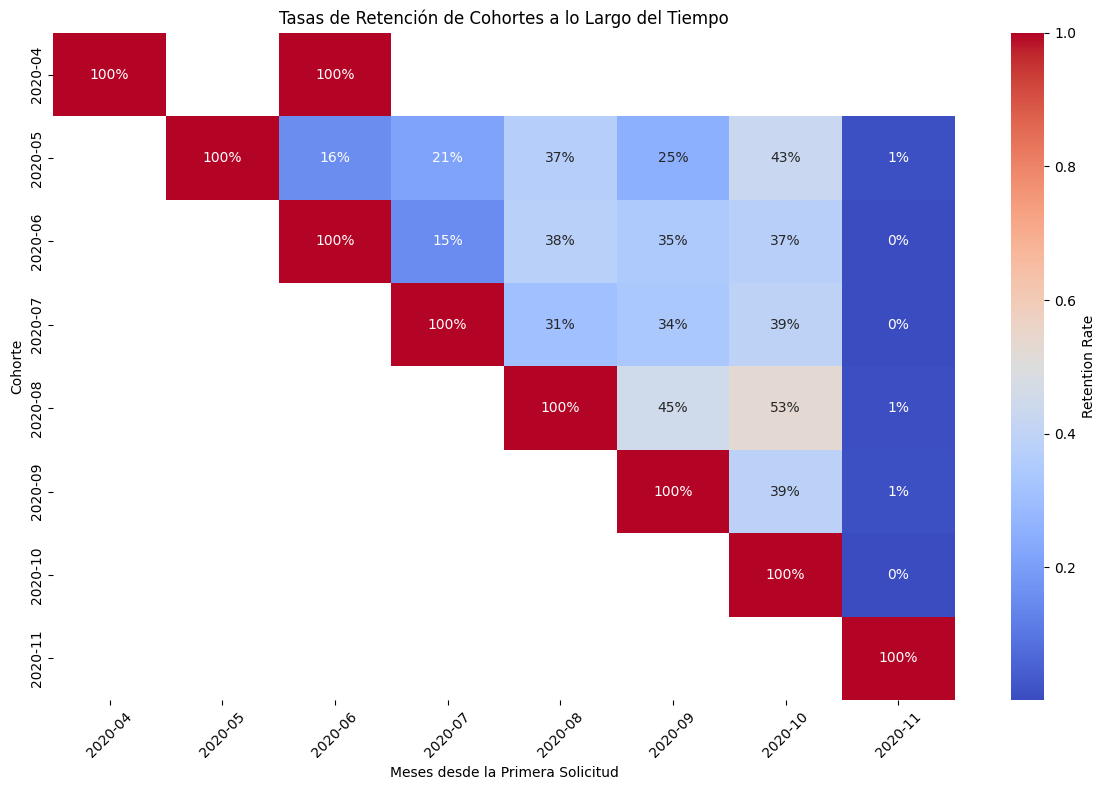

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular el tamaño inicial de las cohortes
cohort_ltv_monthly['Clientes_Iniciales'] = cohort_ltv_monthly.groupby('Cohorte')['Clientes'].transform('first')

# Calcular las tasas de retención
cohort_ltv_monthly['Retention_Rate'] = cohort_ltv_monthly['Clientes'] / cohort_ltv_monthly['Clientes_Iniciales']

# Crear una matriz de retención
retention_matrix = cohort_ltv_monthly.pivot(index='Cohorte', columns='created_at_cr', values='Retention_Rate')

# Crear el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    retention_matrix, 
    annot=True, 
    fmt='.0%', 
    cmap='coolwarm', 
    cbar_kws={'label': 'Retention Rate'}
)
plt.title('Tasas de Retención de Cohortes a lo Largo del Tiempo')
plt.xlabel('Meses desde la Primera Solicitud')
plt.ylabel('Cohorte')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


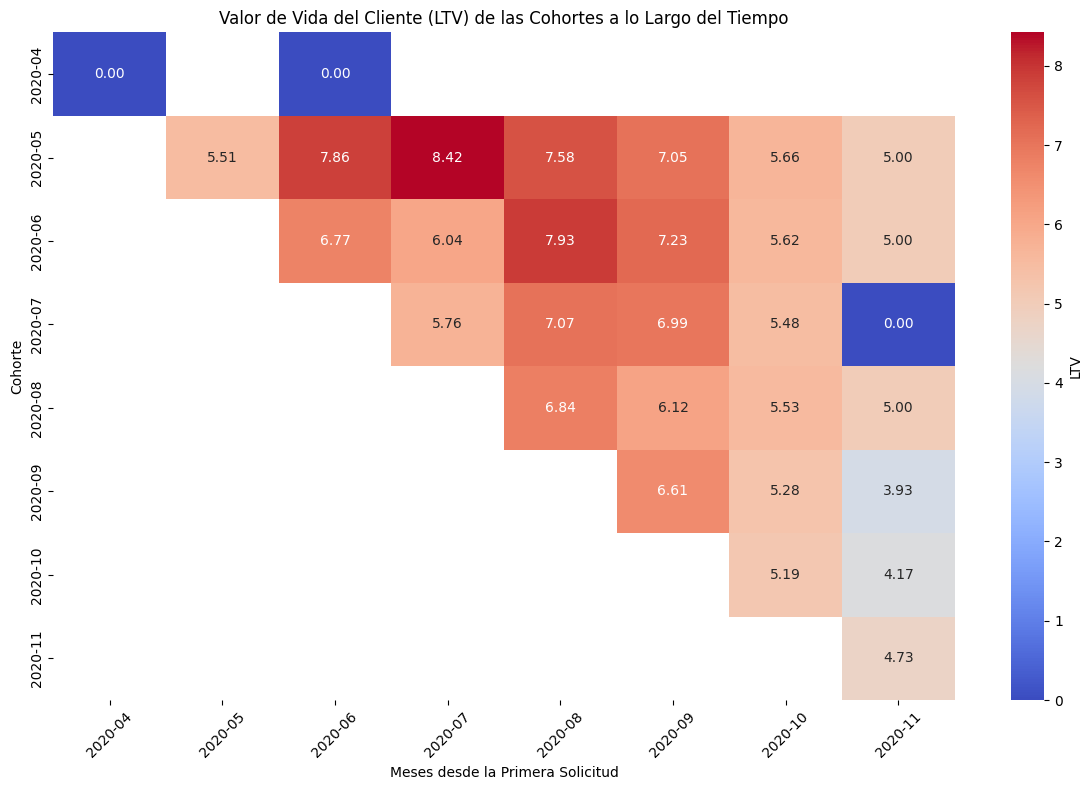

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la matriz de LTV mensual
ltv_matrix = cohort_ltv_monthly.pivot(index='Cohorte', columns='created_at_cr', values='LTV_Mensual')

# Crear el heatmap de LTV
plt.figure(figsize=(12, 8))
sns.heatmap(
    ltv_matrix, 
    annot=True, 
    fmt='.2f',  # Mostrar como número decimal
    cmap='coolwarm', 
    cbar_kws={'label': 'LTV'}
)
plt.title('Valor de Vida del Cliente (LTV) de las Cohortes a lo Largo del Tiempo')
plt.xlabel('Meses desde la Primera Solicitud')
plt.ylabel('Cohorte')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Colores y significados:**
Colores oscuros o intensos: Valores más altos de LTV.
Colores claros o suaves: Valores más bajos de LTV.
Un LTV alto en meses avanzados significa que los clientes siguen generando ingresos mucho después de su primera solicitud. Un LTV que se desvanece rápidamente indica que los clientes dejan de generar ingresos pronto.

**¿Qué buscar en un heatmap de LTV?**
1. Cohortes con LTV más alto:

Filas con colores más intensos.
Estas cohortes son las más valiosas; podrías analizar:
¿Qué promociones o campañas atrajeron a esos clientes?
¿Qué diferencias hay con cohortes menos valiosas?
1. Tendencias a lo largo del tiempo:

Si los colores se vuelven más claros mes a mes, significa que:
Los clientes tienden a generar menos ingresos con el tiempo.
Si algunas cohortes mantienen o aumentan su LTV con el tiempo:
Son clientes leales que siguen generando ingresos.
1. Impacto de cambios en el negocio:

Si aplicaste un nuevo método de fees o estrategia de marketing en un mes específico, puedes ver si las cohortes siguientes tienen un LTV más alto o bajo.

**Ejemplo de interpretación:**
* Si la cohorte de marzo de 2020 muestra un LTV alto y estable durante varios meses:
  *  Podrías analizar qué hiciste diferente ese mes (promociones, campañas, etc.) para replicarlo.
* Si las cohortes más recientes tienen un LTV más bajo que las antiguas:
    * Podría ser señal de que necesitas ajustar las estrategias de fidelización o revisar si hay problemas con los fees recientes.